Econ Week 5

Structural Estimation

Kendra Robbins

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy import special as sp
import scipy.optimize as opt
import math
import scipy
import scipy.integrate as integrate
from scipy import stats as sts

# Exercise 1

## a)

In [2]:
clms = np.loadtxt('clms.txt')

In [3]:
mean = np.mean(clms)
median = np.median(clms)
max = np.max(clms)
min = np.min(clms)
sd = np.std(clms)

print ("mean:",str(mean),"\nmedian:",median,"\nmax:",max,"\nmin:",min,"\nstandard deviation:",sd)

mean: 720.2779753272437 
median: 172.21 
max: 227967.25 
min: 0.01 
standard deviation: 3972.663756393663


(0, 22800)

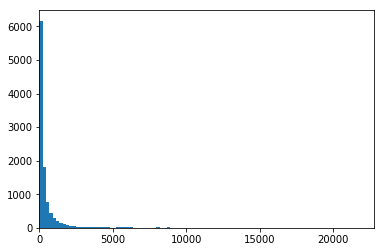

In [4]:
plt.hist(clms,bins=1000)
plt.xlim(0, 22800)

[]

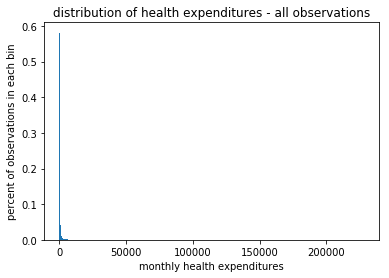

In [5]:
num_bins =1000
weights = (1/10619)*np.ones_like(clms)
n,bincuts,patches = plt.hist(clms,num_bins,weights=weights)
plt.xlabel("monthly health expenditures")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of health expenditures - all observations")
plt.plot()

[]

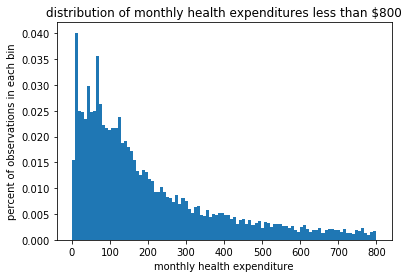

In [6]:
weights = (1/10619)*np.ones_like(clms)

n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.plot()

One may prefer the second histogram because it shows variation in the majority of the observations wheras the first histogram only shows that most observations are near 0 and there is a high outlier. 

b.)

In [7]:
#ga_pdf returns the value of a GA pdf with specified α,β values at a specified x
def pdf_ga(xvals,α,β):
    pdf = 1/((β**α)*sp.gamma(α)) * xvals**(α-1)*np.exp(-(xvals/β))
    return pdf

#loglike_ga returns the log likelihood of a GA distribution with parameters α,β, evaluated at x
def loglike_ga(xvals, α, β):
    pdf = pdf_ga(xvals, α, β)
    ln_pdf = np.log(pdf)
    loglike = ln_pdf.sum()
    return loglike

In [8]:
#crit_ga returns the negative log likelihood of of GA distribution
def crit_ga(params, *args):
    
    α,β=params
    xvals=args
    loglike=loglike_ga(xvals,α,β)
    neg_loglike = -loglike 
    return neg_loglike

In [9]:
β_init = sd**2 / mean
α_init = mean/β_init
params_init = np.array([α_init,β_init])
result = opt.minimize(crit_ga,params_init,args=clms,method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None)))
α_MLE, β_MLE = result.x
loglikval = -result.fun
print("α_MLE:", α_MLE, "\nβ_MLE:",β_MLE, "\nlog likelihood value:",loglikval)

α_MLE: 0.22175532272679777 
β_MLE: 21911.064699249375 
log likelihood value: -82076.45160566256


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


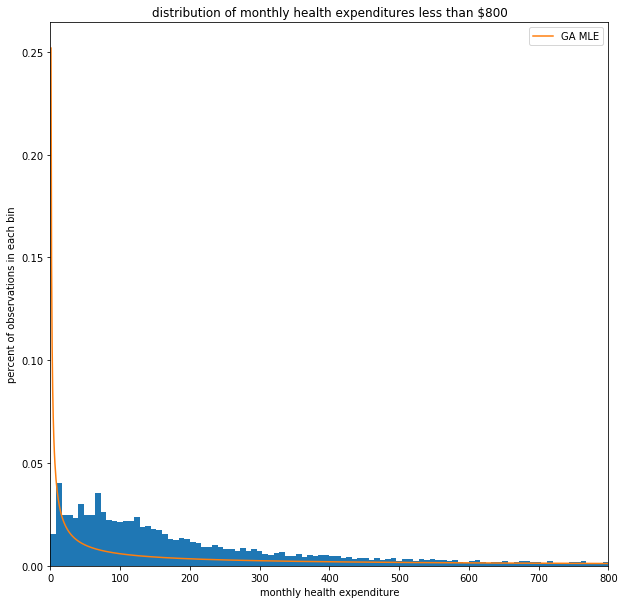

In [10]:
weights = (1/10619)*np.ones_like(clms)
plt.figure(figsize=(10, 10))
D=np.linspace(0,800,1000)
n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.xlim(0,800)

#multiply the PDF by 8 because the bars have length 8
plt.plot(D, 8*pdf_ga(D,α_MLE,β_MLE), label="GA MLE")
plt.legend()
plt.show()

## c.)


In [85]:
#gg_pdf returns the value of a GG pdf with parameters α,β,m evaluated at xvals
def pdf_gg(xvals,α,β,m):
    pdf = m/((β**α)*sp.gamma(α/m)) * xvals**(α-1)*np.exp((-(xvals/β))**m)
    return pdf

#loglike_gg returns the log likelihood of a GG distribution with parameters α,β,m evaluated at xvals
def loglike_gg(xvals, α, β, m):
    pdf = pdf_gg(xvals, α, β, m)
    ln_pdf = np.log(pdf)
    loglike = ln_pdf.sum()
    return loglike

In [86]:
#crit_gg returns the negative log likelihood of of GG distribution
def crit_gg(params, *args):
    α,β,m=params
    xvals=args
    loglike=loglike_gg(xvals,α,β,m)
    neg_loglike = -loglike 
    return neg_loglike

In [87]:
β_init_gg = sd**2 / mean
α_init_gg = mean/β_init_gg
m_init_gg=1
params_init_gg = np.array([α_init_gg,β_init_gg,m_init_gg])
result_gg = opt.minimize(crit_gg,params_init_gg,args=clms,method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None),(1e-5, None)))
α_MLE_gg, β_MLE_gg, m_MLE_gg = result_gg.x

loglikval_gg = loglike_gg(clms,α_MLE_gg,β_MLE_gg,m_MLE_gg)

#loglikval = -result_gg.fun
print("α_MLE:", α_MLE_gg, "\nβ_MLE:",β_MLE_gg, "\nm_MLE:",m_MLE_gg, "\nlog likelihood value:",loglikval_gg)

α_MLE: 0.032872796694206986 
β_MLE: 21911.064702753894 
m_MLE: 1.0 
log likelihood value: -93555.39390345218


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


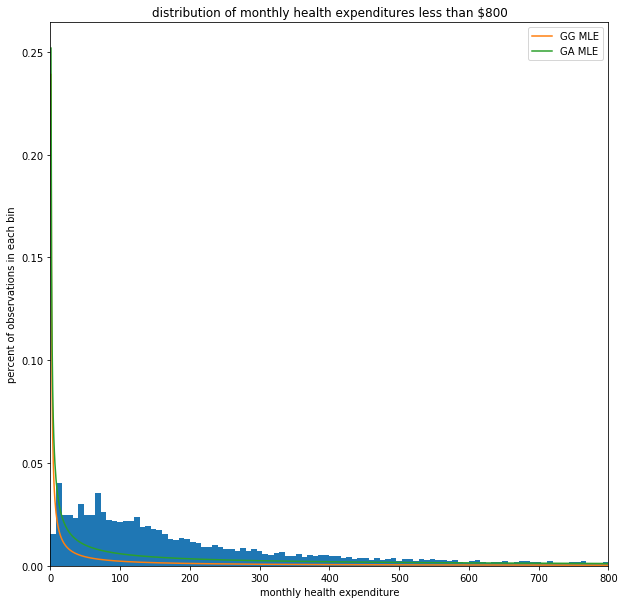

In [89]:
weights = (1/10619)*np.ones_like(clms)
plt.figure(figsize=(10, 10))
D=np.linspace(0,800,1000)
n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.xlim(0,800)
plt.plot(D, 8*pdf_gg(D,α_MLE_gg,β_MLE_gg,m_MLE_gg), label="GG MLE")
plt.plot(D, 8*pdf_ga(D,α_MLE,β_MLE), label="GA MLE")
plt.legend()
plt.show()

## d.)

In [96]:
#pdf_gb2 returns the value of a GB2 pdf with parameters a,b,p,q evaluated at xvals
def pdf_gb2(xvals,a,b,p,q):  
    pdf = a*xvals**(a*p-1) / (b**(a*p)*sp.beta(p,q)*(1+(xvals/b)**a)**(p+q))    
    return pdf

#loglike_gb2 returns the log likelihood of a GB2 distribution with parameters a,b,p,q evaluated at xvals
def loglike_gb2(xvals,a,b,p,q):
    pdf = pdf_gb2(xvals, a,b,p,q)
    ln_pdf = np.log(pdf)
    loglike = ln_pdf.sum()
    return loglike

#crit_gb2 returns the negative log likelihood of GB2 distribution
def crit_gb2(params, *args):
    a,b,p,q=params
    xvals=args
    loglike=loglike_gb2(xvals,a,b,p,q)
    neg_loglike = -loglike 
    return neg_loglike

In [104]:
b_init_gb2 = β_MLE_gg
a_init_gb2 = α_MLE_gg
p_init_gb2= m_MLE_gg
q_init_gb2=200

params_init_gb2 = np.array([a_init_gb2,b_init_gb2,p_init_gb2,q_init_gb2])
result_gb2 = opt.minimize(crit_gb2,params_init_gb2,args=clms,method ='L-BFGS-B', bounds=((1e-5, None), (1e-5, None),(1e-5, None),(1e-5, None)))
a_MLE_gb2, b_MLE_gb2, p_MLE_gb2, q_MLE_gb2 = result_gb2.x

loglikval_gb2 = loglike_gb2(clms,a_MLE_gb2,b_MLE_gb2,p_MLE_gb2,q_MLE_gb2)

#loglikval = -result_gg.fun
print("a_MLE:", a_MLE_gb2, "\nb_MLE:",b_MLE_gb2, "\np_MLE:",p_MLE_gb2, "\nq_MLE:",q_MLE_gb2, "\nlog likelihood value:",loglikval_gb2)

a_MLE: 1.4569515383167415 
b_MLE: 21911.064766058767 
p_MLE: 0.8388199344735949 
q_MLE: 199.99376135742136 
log likelihood value: -95752.50847414679


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


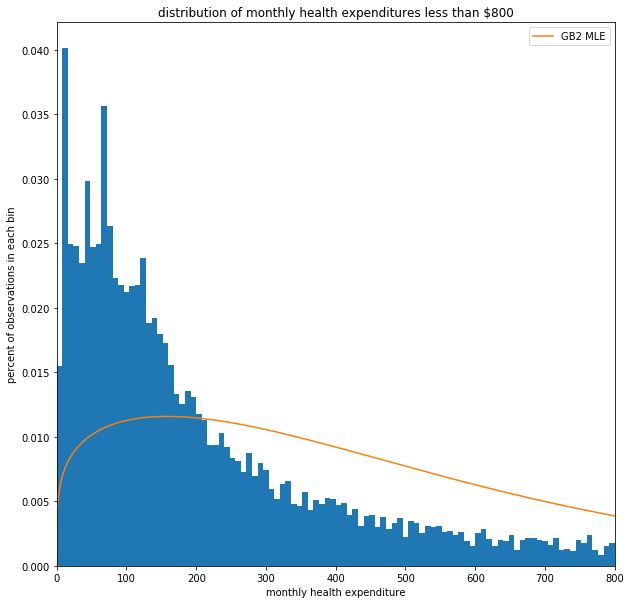

In [109]:
weights = (1/10619)*np.ones_like(clms)
plt.figure(figsize=(10, 10))
D=np.linspace(0,800,1000)
n2,bincuts2,patches2 = plt.hist(clms,bins=100, range=(0,800),weights=weights)
plt.xlabel("monthly health expenditure")
plt.ylabel("percent of observations in each bin")
plt.title("distribution of monthly health expenditures less than $800")
plt.xlim(0,800)
#plt.plot(D, 8*pdf_gg(D,α_MLE,β_MLE,m_MLE), label="GG MLE")
#plt.plot(D, 8*pdf_ga(D,α_MLE,β_MLE), label="GA MLE")
plt.plot(D,8*pdf_gb2(D,a_MLE_gb2,b_MLE_gb2,p_MLE_gb2,q_MLE_gb2),label="GB2 MLE")
plt.legend()
plt.show()

## 1.e)

In [ ]:
log_lik_h0 = log_lik_truncnorm(pts, mu_1, sig_1, 0, 450)
log_lik_mle = log_lik_truncnorm(pts, mu_MLE, sig_MLE, 0, 450)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

In [111]:
loglike_b = loglike_ga(clms, α_MLE, β_MLE)
loglike_d = loglike_gb2(clms, a_MLE_gb2,b_MLE_gb2,p_MLE_gb2,q_MLE_gb2)
loglike_c = loglike_gg(clms, α_MLE_gg, β_MLE_gg, m_MLE_gg)

In [114]:
LR_b = 2*(loglike_b - loglike_d)
LR_c = 2*(loglike_c-loglike_d)

pval_b = 1-sts.chi2.cdf(LR_b, 4)
pval_c = 1-sts.chi2.cdf(LR_c, 4)

print("χ2(4) for part b:", pval_b,"\nχ2(4) for part c:", pval_c)

χ2(4) for part b: 0.0 
χ2(4) for part c: 0.0


## 1.f)

In [121]:
prob = 1-integrate.quad(pdf_gb2,0, 1000, args=(a_MLE_gb2,b_MLE_gb2,p_MLE_gb2,q_MLE_gb2))[0]

In [123]:
print("probability of claim > $1000 with GB2 distribution:",prob)

probability of claim > $1000 with GB2 distribution: 0.08117128528860673


# Problem 2

## a.) 


In [48]:
macro = pd.read_csv('MacroSeries.txt', names=['c','k','w','r','y'])

In [49]:
#get_z uses equation 3 to compute z given k,w,α
def get_z(k,w,α):
    z = np.log(w/((1-α)*k**α))
    return z
   
#loglike_z returns the log likehood of z values 
def loglike_z(k,w,α,μ,ρ,σ):
    z=get_z(k,w,α)
    z_pdf_vals = np.empty_like(z)
    
    for i in range(len(z)):
        if i == 0: 
            z_pdf_vals[i]=norm.pdf(μ,loc=μ,scale=σ**2)
        else:
            z_pdf_vals[i]=norm.pdf(z[i],loc=ρ*z[i-1]+(1-ρ)*μ,scale=σ**2)
    
    ln_z_pdf_vals = np.log(z_pdf_vals)
    loglike=ln_z_pdf_vals.sum()
    return loglike
   
#crit is the function that we will minimize  
def crit(params, *args):
    α,μ,ρ,σ=params
    k,w=args
    loglike = loglike_z(k,w,α,μ,ρ,σ)
    return -loglike 
    

In [132]:
α_init=.42
μ_init=.4
ρ_init=.9
σ_init=.4
params_init_z=[α_init,μ_init,ρ_init,σ_init]
args_z = (macro['k'],macro['w'])
result = opt.minimize(crit, params_init_z, args_z, method ='L-BFGS-B', bounds=((1e-4, 0.9999),(1e-4, None),(-0.99, 0.99),(1e-2, None)))
α_MLE, μ_MLE, ρ_MLE, σ_MLE = result.x
loglike= -result.fun

vcv_mle = result.hess_inv.todense()

# Change the sign of the off-diagonal elements
vcv_mle = np.eye(4) * vcv_mle + (np.eye(4) - 1) * vcv_mle

print("α MLE:",α_MLE,"\nμ MLE:", μ_MLE,"\nρ MLE:", ρ_MLE,"\nσ MLE:", σ_MLE,"\nlog likelihood:",loglike)

print('VCV(MLE) = \n', vcv_mle)

α MLE: 0.5533967347824656 
μ MLE: 8.106646655065902 
ρ MLE: 0.8246543817259715 
σ MLE: 0.30459854227054356 
log likelihood: 95.8582756909156
VCV(MLE) = 
 [[ 6.48693447e+00  8.52643125e+01  5.53061772e-01 -7.39526783e-01]
 [ 8.52643125e+01  1.12072619e+03 -7.26942849e+00  9.72040396e+00]
 [ 5.53061772e-01 -7.26942849e+00  5.04231557e-02  6.22648393e-02]
 [-7.39526783e-01  9.72040396e+00  6.22648393e-02  8.50058313e-02]]


## b.)

In [134]:
#get z as a function of k and r using equation 4
def get_z2(k,r,α):
    z = np.log(r/(α*k**(α-1)))
    return z 

#get the log likelihood of z values
def loglike_z2(k,r,α,μ,ρ,σ):
    z=get_z(k,r,α)
    z_pdf_vals = np.empty_like(z)
    
    for i in range(len(z)):
        if i == 0: 
            z_pdf_vals[i]=norm.pdf(μ,loc=μ,scale=σ**2)
        else:
            z_pdf_vals[i]=norm.pdf(z[i],loc=ρ*z[i-1]+(1-ρ)*μ,scale=σ**2)
    
    ln_z_pdf_vals = np.log(z_pdf_vals)
    loglike=ln_z_pdf_vals.sum()
    return loglike

#crit2 is the function that we will minimize  
def crit2(params, *args):
    α,μ,ρ,σ=params
    k,w=args
    loglike = loglike_z2(k,w,α,μ,ρ,σ)
    return -loglike 
    

In [138]:
α_init2=.6
μ_init2=.6
ρ_init2=.9
σ_init2=.4
params_init_z2=[α_init,μ_init,ρ_init,σ_init]
args_z2 = (macro['k'],macro['r'])
result2 = opt.minimize(crit2, params_init_z2, args_z2, method ='L-BFGS-B', bounds=((1e-4, 0.9999),(1e-4, None),(-0.99, 0.99),(1e-2, None)))
α_MLE2, μ_MLE2, ρ_MLE2, σ_MLE2 = result2.x
loglike2= -result2.fun

vcv_mle2 = result2.hess_inv.todense()

# Change the sign of the off-diagonal elements
vcv_mle2 = np.eye(4) * vcv_mle2 + (np.eye(4) - 1) * vcv_mle2

print("α MLE:",α_MLE2,"\nμ MLE:", μ_MLE2,"\nρ MLE:", ρ_MLE2,"\nσ MLE:", σ_MLE2,"\nlog likelihood:",loglike2)

print('VCV(MLE) = \n', vcv_mle)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


α MLE: 0.0001 
μ MLE: 0.000819732307553284 
ρ MLE: 0.41783660131666067 
σ MLE: 0.3095225119587981 
log likelihood: 92.65103502213849
VCV(MLE) = 
 [[ 6.48693447e+00  8.52643125e+01  5.53061772e-01 -7.39526783e-01]
 [ 8.52643125e+01  1.12072619e+03 -7.26942849e+00  9.72040396e+00]
 [ 5.53061772e-01 -7.26942849e+00  5.04231557e-02  6.22648393e-02]
 [-7.39526783e-01  9.72040396e+00  6.22648393e-02  8.50058313e-02]]


## c.)

In [94]:
zt_1 = 10 #z_t-1
kt=7500000

#use equation 4 to solve for z_start such that r=1 and k=7500000
z_star = get_z2(kt,1,α_MLE)

prob = 1 - norm.cdf(z_star, loc=ρ_MLE*zt_1 + (1-ρ_MLE)*μ_MLE, scale=σ_MLE**2)

prob

1.0

# Exercise 3

In [73]:
inc = pd.read_table('usincmoms.txt',header=None,names=['p','m'])
#'p' is the percent of households in that bracket
#'m' is the midpoint of that income bracket 

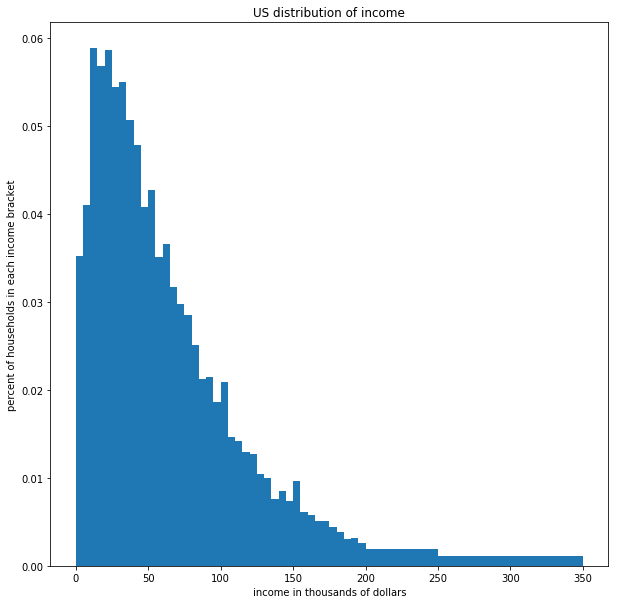

In [99]:
m_in_dollars = inc['m']/1000
wts = inc['p'].copy()
wts[41]=wts[41]/20
wts[40] =wts[40]/10

bins = np.append(np.linspace(0,200,41),[250,350])

plt.figure(figsize=(10, 10))
a,b,c=plt.hist(m_in_dollars, weights=wts, bins=bins)
plt.xlabel("income in thousands of dollars")
plt.ylabel("percent of households in each income bracket")
plt.title("US distribution of income")

plt.show()

## 3b.)

In [75]:
#log normal pdf 
#μ in (-inf, inf)
#σ >0
def pdf_ln(xvals, μ, σ):
    pdf = 1/(xvals*σ*math.sqrt(2*np.pi)) * np.exp(-(np.log(xvals)-μ)**2/(2*σ**2))
    return pdf


#modelmoments() calculates the model moments for given μ,σ. 
#to calculate percents, modelmoments() integrates 42 intervals of the LN pdf, using the bins specified in #3a
def modelmoments(μ,σ):
    mod_moments = np.empty(42)
    for i in range(42):
        if i<41:
            mod_moments[i]=integrate.quad(lambda x: pdf_ln(x, μ, σ), bins[i], bins[i+1])[0]
        else:
            mod_moments[i]=integrate.quad(lambda x: pdf_ln(x, μ, σ), bins[i], np.inf)[0]
    return mod_moments


#error vector
#computes distance between data moments and model moments 
#simple = True if errors are simple difference
#simple = False if errors are percent deviation from data moments 
#datamoments = inc.p
def error(inc, μ,σ,simple=False):  ##data issue here
    data_moments = np.array(inc['p'])
    mod_moments = modelmoments(μ,σ)
    
    if simple==True:
        err = mod_moments - data_moments
    if simple==False:
        err = (mod_moments - data_moments)/data_moments
        
    return err 

In [76]:
#construct weighting matrix W
W = np.zeros((42,42))
for i in range(42):
    W[i,i]=inc['p'][i]
    
    
#crit returns the function, error*W*error, which we want to minimize
def crit_ln(params, args):
    μ,σ=params
    inc, W = args 
    err=error(inc,μ,σ)
    return err.T@W@err

In [107]:
#GMM happens here 

μ_init_ln = 4.2
σ_init_ln = 1.1
params_init_ln = np.array([μ_init_ln, σ_init_ln])
args_ln =[inc, W]

result_ln = opt.minimize(crit_ln, params_init_ln, args = args_ln, method='L-BFGS-B', bounds=((None,None),(1e-6,None)))
μ_ln, σ_ln = result_ln.x

print("μ GMM:",μ_ln,"\nσ GMM:",σ_ln, "\nminimized criterion function:", crit_ln((μ_ln,σ_ln),(inc,W)))



μ GMM: 3.8590887831080782 
σ GMM: 0.9078411791305002 
minimized criterion function: 0.04594528252973356


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


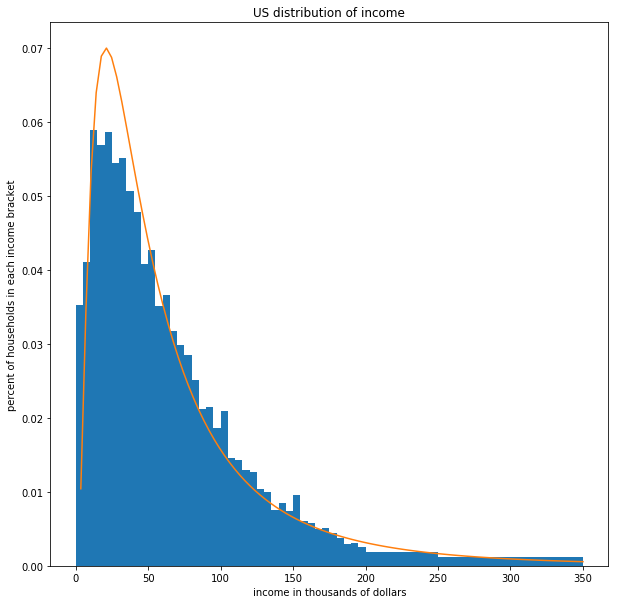

In [108]:
# mod_momln = modelmoments(μ_ln,σ_ln)
# mod_momln[40] = mod_momln[40]/10
# mod_momln[41] = mod_momln[41]/20

# mod_momln

xgrid = np.linspace(0,350,100)

plt.figure(figsize=(10, 10))
a,b,c=plt.hist(m_in_dollars, weights=wts, bins=bins)
plt.plot(xgrid, 5*pdf_ln(xgrid,μ_ln,σ_ln))
plt.xlabel("income in thousands of dollars")
plt.ylabel("percent of households in each income bracket")
plt.title("US distribution of income")

plt.show()

## 3.c)

In [109]:
#a PDF function for a GA distribution was defined previously 

def modelmoments_ga(α,β):
    mod_moments = np.empty(42)
    for i in range(42):
        if i<41:
            mod_moments[i]=integrate.quad(lambda x: pdf_ga(x, α, β), bins[i], bins[i+1])[0]
        else:
            mod_moments[i]=integrate.quad(lambda x: pdf_ga(x, α, β), bins[i], np.inf)[0]
    return mod_moments


#error vector
#computes distance between data moments and model moments 
#simple = True if errors are simple difference
#simple = False if errors are percent deviation from data moments 
#datamoments = inc.p
def error(datamoments, α,β,simple=False):
    data_moments = np.array(datamoments)
    mod_moments = modelmoments_ga(α,β)
    
    if simple==True:
        err = mod_moments - data_moments
    if simple==False:
        err = (mod_moments - data_moments)/data_moments
        
    return err 
    

In [110]:
#construct weighting matrix W
W = np.zeros((42,42))
for i in range(42):
    W[i,i]=inc['p'][i]
    
    
#crit returns the function, error*W*error, which we want to minimize
def crit_ga(params, args):
    α,β=params
    datamoments, W = args 
    err=error(datamoments,α,β)
    return err.T@W@err

In [114]:
#GMM happens here 

α_init_ga = 3
β_init_ga = 20
params_init_ga = np.array([α_init_ga,β_init_ga])
args_ga =[inc.p, W]

result_gmm_ga = opt.minimize(crit_ga, params_init_ga, args = args_ga, method='L-BFGS-B', bounds=((1e-6,None),(1e-6,None)))
α_gmm_ga,β_gmm_ga = result_gmm_ga.x

print("α GMM:",α_gmm_ga,"\nβ GMM:",β_gmm_ga, "\nminimized criterion function:", crit_ga((α_gmm_ga,β_gmm_ga),(inc.p,W)))




α GMM: 1.3618296228153628 
β GMM: 48.36161175072533 
minimized criterion function: 0.01234304624674347


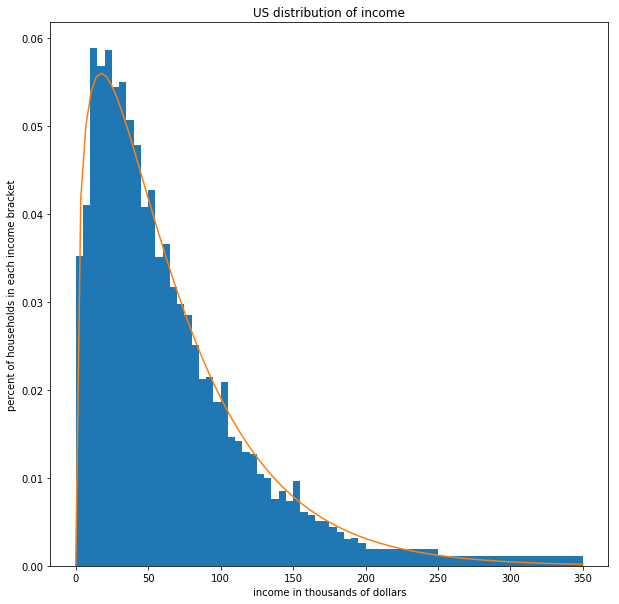

In [116]:
xgrid = np.linspace(0,350,100)

plt.figure(figsize=(10, 10))
a,b,c=plt.hist(m_in_dollars, weights=wts, bins=bins)
plt.plot(xgrid, 5*pdf_ga(xgrid,α_gmm_ga,β_gmm_ga))
plt.xlabel("income in thousands of dollars")
plt.ylabel("percent of households in each income bracket")
plt.title("US distribution of income")

plt.show()

## 3d)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


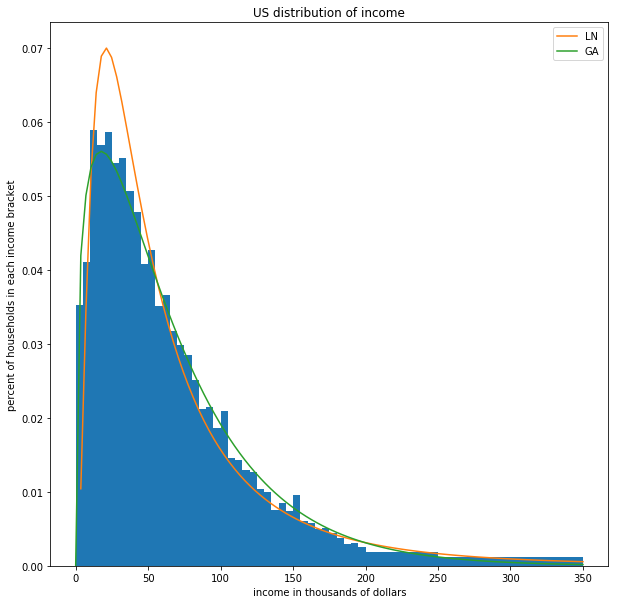

In [119]:
plt.figure(figsize=(10, 10))
a,b,c=plt.hist(m_in_dollars, weights=wts, bins=bins)
plt.xlabel("income in thousands of dollars")
plt.ylabel("percent of households in each income bracket")
plt.title("US distribution of income")
plt.plot(xgrid, 5*pdf_ln(xgrid,μ_ln,σ_ln), label = "LN")
plt.plot(xgrid, 5*pdf_ga(xgrid,α_gmm_ga,β_gmm_ga), label = "GA")
plt.legend()
plt.show()

To assess which distribution fits the data better, we can compare their errors

# Exercise 4

data is imported in #2

In what way does GMM not have distributional assumptions? If we don't assume a distribution, how do we get the model moments? 

In [51]:
def get_z(k,w,α):
    z = np.log(w/((1-α)*k**α))
    return z

def get_z2(k,r,α):
    z = np.log(r/(α*k**(α-1)))
    return z

In [56]:
#moments

#Define functions which return each moment condition
def moment1(ztp1, zt, ρ, μ):
    out = ztp1 - ρ * zt - (1 - ρ) * μ
    return out

def moment2(ztp1, zt, ρ, μ):
    out = (ztp1 - ρ * zt - (1 - ρ) * μ) * zt
    return out

def moment3(ztp1, β, α, ktp1, ct, ctp1):
    out = β * α * np.exp(ztp1) * ktp1 ** (α - 1) * (ct / ctp1) - 1
    return out
    
def moment4(ztp1, β, α, ktp1, ct, ctp1, wt):
    out = (β * α * np.exp(ztp1) * ktp1 ** (α - 1) * (ct / ctp1) - 1) * wt
    return out

In [57]:
# define W
W = np.eye(4)

In [58]:
def data_moments(params, data):
    
    α, β, ρ, μ = params
    
    zt = get_z2(macro.k, macro.r, α)[1:]
    ztp1 = get_z2(macro.k, macro.r, α)[:-1]
    kt = data.k[1:]
    ktp1 = data.k[:-1]
    wt = data.w[1:]
    ct = data.c[1:]
    ctp1 = data.c[:-1]
    
    mom1_vec = moment1(ztp1, zt, ρ, μ)
    mom2_vec = moment2(ztp1, zt, ρ, μ)
    mom3_vec = moment3(ztp1, β, α, ktp1, ct, ctp1)
    mom4_vec = moment4(ztp1, β, α, ktp1, ct, ctp1, wt)
    
    mean1 = mom1_vec.mean()
    mean2 = mom2_vec.mean()
    mean3 = mom3_vec.mean()
    mean4 = mom4_vec.mean()
    
    data_moments = np.array([mean1, mean2, mean3, mean4])
    return data_moments 
    
    
    
#crit4 is the function that we will minimize
#the model moments are zero, so the error is just the data moments 
def crit4(params, args):

    α, β, ρ, μ = params
    data, W = args
    
    error = data_moments(params, data)
    crit = error.T@W@error 
    return crit 

In [60]:
α_init4 = .42
β_init4 = .4
ρ_init4 = -.4
μ_init4 = 100
params_init4 = np.array([α_init4, β_init4, ρ_init4, μ_init4])
args4=[macro,W]

result4 = opt.minimize(crit4, params_init4, args = args4, method='L-BFGS-B', bounds=((1e-6,None),(1e-6,None),(-.9999,.9999),(1e-6,None)))
α_GMM4, β_GMM4, ρ_GMM4, μ_GMM4 = result4.x

params_GMM4 = np.array([α_GMM4, β_GMM4, ρ_GMM4, μ_GMM4])
min_crit4 = crit4(params_GMM4,args4)

print("α GMM:",α_GMM4, "\nβ GMM:", β_GMM4,"\nρ GMM:", ρ_GMM4, "\nμ GMM:", μ_GMM4, "\nminimized criterion function value:", min_crit4)

α GMM: 0.8973246917410075 
β GMM: 0.9829915853188296 
ρ GMM: 0.9999000000000001 
μ GMM: 99.98232498221114 
minimized criterion function value: 0.0004473555748165455
